### Binary  Classification 


##### Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(45)

In [2]:
study_hours = np.append(
    np.random.normal(4, 1.2, 200),
    np.random.normal(10, 1.6, 100)
)
# fail = 0, pass = 1
result = np.append(
    np.zeros(200),
    np.ones(100)
)


In [3]:
dataset = pd.DataFrame({"study hours": study_hours, "result": result})
dataset.head()

,study hours,result
0,4.031650,0.0
1,4.312386,0.0
2,3.525825,0.0
3,3.754839,0.0
4,2.474041,0.0


In [4]:
dataset.tail()

,study hours,result
295,10.142463,1.0
296,9.823439,1.0
297,11.216816,1.0
298,10.545746,1.0
299,9.931229,1.0


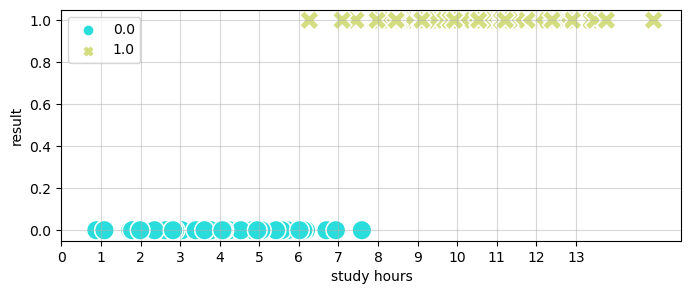

In [5]:
plt.figure(figsize=(8, 3))
sns.scatterplot(data=dataset, x="study hours", y="result",
                hue="result", style="result", s=200, palette="rainbow",)
plt.grid(alpha=0.5)
plt.legend()
#plt.yticks([0, 1], ["Fail", "Pass"])
plt.xticks(np.arange(14))
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = dataset[["study hours"]]
y = dataset["result"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.1,
                                                   random_state=45)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()

In [11]:
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_hat = model.predict(X_train)

In [13]:
print(min(y_hat), max(y_hat))

-0.33883897888473763 1.4937368831156315


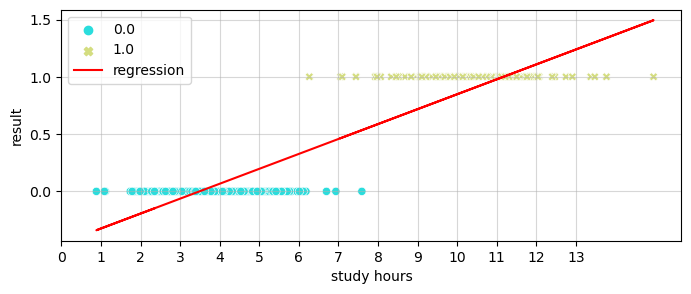

In [14]:
plt.figure(figsize=(8, 3))
sns.scatterplot(data=dataset, x="study hours", y="result",
                hue="result", style="result", palette="rainbow",)
plt.plot(X_train, y_hat, color="red", label="regression")
plt.grid(alpha=0.5)
plt.legend()
#plt.yticks([0, 1], ["Fail", "Pass"])
plt.xticks(np.arange(14))
plt.show()

In [15]:
def logit(t):
    return 1 / (1+np.exp(-t))

In [16]:
t = np.linspace(-10, 10, 500)
ft = logit(t)

$$ logit = \frac {1} {1+(1+e^{-t})}$$

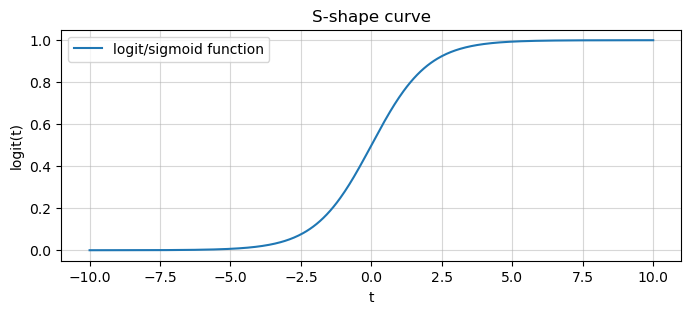

In [169]:
plt.figure(figsize=(8, 3))
plt.plot(t, ft, label="logit/sigmoid function")
plt.xlabel("t")
plt.ylabel("logit(t)")
plt.grid(alpha=0.5)
plt.legend()
plt.title("S-shape curve")
plt.show()

$$\hat p = \frac {1} {(1+e^{-t})}$$

$$t = \theta_0 + \theta_1 X1 $$

$$ \hat p = \frac {1} {(1+e^{-(\theta_0 + \theta_1 X1)})} $$

if $\hat p >= 0.5 $ then $ \hat y =  1 $ / pass

else $\hat p < 0.5 $ then $ \hat y = 0 $ / fail

In [17]:
p = np.linspace(0.01, 1, 100)
log_p = np.log(p)

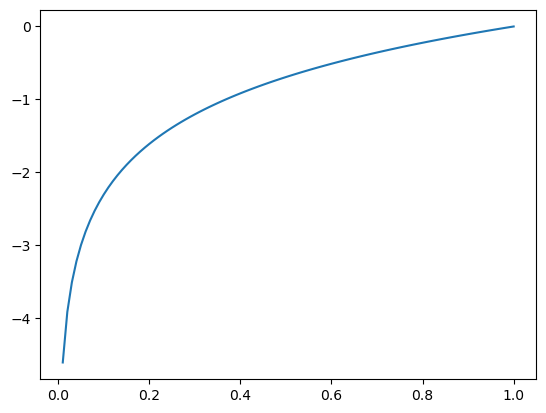

In [18]:
plt.plot(p, log_p)
plt.show()

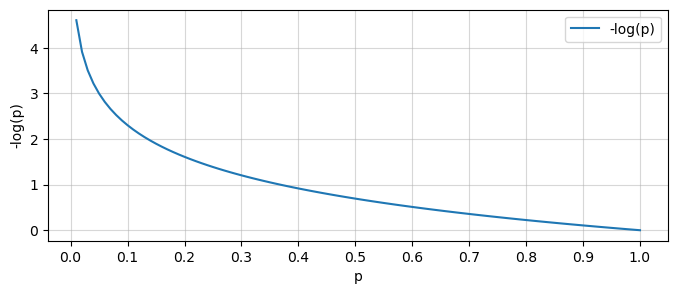

In [19]:
plt.figure(figsize=(8, 3))
plt.plot(p, -log_p, label="-log(p)")
plt.legend()
plt.grid(alpha=0.5)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlabel("p")
plt.ylabel("-log(p)")
plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
model = LogisticRegression()

In [22]:
model.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_hat = model.predict(X_train)

In [24]:
y_train[:5].to_numpy()

array([1., 1., 0., 0., 1.])

In [25]:
y_hat[:5]

array([1., 1., 0., 0., 1.])

In [27]:
y_proba = model.predict_proba(X_train)

In [28]:
y_proba.shape
# 1st column -> negative class -> Fail Pass, (0, 1)

(270, 2)

In [29]:
y_proba[:5]

array([[4.79446627e-01, 5.20553373e-01],
       [4.00522725e-07, 9.99999599e-01],
       [9.99873592e-01, 1.26408310e-04],
       [9.99566607e-01, 4.33393072e-04],
       [1.71107560e-06, 9.99998289e-01]])

In [30]:
p_fail = y_proba[:, 0]
p_pass = y_proba[:, 1]

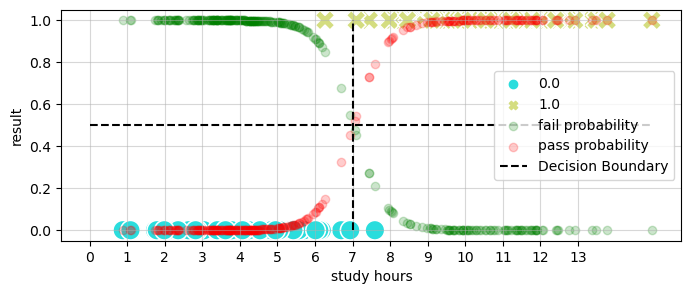

In [31]:
plt.figure(figsize=(8, 3))
sns.scatterplot(data=dataset, x="study hours", y="result",
                hue="result", style="result", palette="rainbow", s=200)


plt.scatter(X_train, p_fail, color='green', alpha=0.2, label="fail probability")
plt.scatter(X_train, p_pass, color="red", alpha=0.2, label="pass probability")

plt.hlines(0.5, 0, 15, ls='--', color="k", label="Decision Boundary")
plt.vlines(7, 0, 1, ls='--', color="k")
plt.grid(alpha=0.5)
plt.legend()
#plt.yticks([0, 1], ["Fail", "Pass"])
plt.xticks(np.arange(14))
plt.show()

### Classification Evaluation Metrices